<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple hold-out validation - Using [Second CNN](https://github.com/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2_WithoutNormalizations.ipynb) **

Using the v2 model with two Dropouts, Data Aug, L2 and Batch Normalization for 50 epochs.


```
No overfitting but Training set is approaching 1 slowly, and validation fluctuates a lot. Maybe we need more epochs or change of learning rate.

Accuracy without Dropout = 71.54%
Accuracy with Dropout = 75.55%
Accuracy with 2 Dropouts = 75.79%
Accuracy with Data Aug = 78.84 %
Accuracy with L2 and Batch Normalization = 66.94 %
Accuracy with all(50 epochs) = 62.71%
```



**Loading the CIFAR10 set**

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


**Preparing data**

Training/Validation 80%/20%


In [2]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [4]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import BatchNormalization

model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxP

**Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(train_images)

**Compiling the model**

In [0]:
import keras
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

**Training the model**

In [7]:
history = model.fit_generator(datagen.flow(train_images, 
                                           train_labels, 
                                           batch_size=32),
                                           epochs=50,
                                           steps_per_epoch=1250,
                                           validation_data=(val_images, val_labels),
                                           validation_steps=312)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1250/1250 [==============================] - 38s 30ms/step - loss: 3.7742 - acc: 0.3175 - val_loss: 2.2877 - val_acc: 0.4530
Epoch 2/50
1250/1250 [==============================] - 36s 29ms/step - loss: 2.1314 - acc: 0.4354 - val_loss: 2.0575 - val_acc: 0.4528
Epoch 3/50
1250/1250 [==============================] - 36s 29ms/step - loss: 1.8307 - acc: 0.4906 - val_loss: 2.4358 - val_acc: 0.3694
Epoch 4/50
1250/1250 [==============================] - 35s 28ms/step - loss: 1.7277 - acc: 0.5150 - val_loss: 1.7799 - val_acc: 0.5264
Epoch 5/50
1250/1250 [==============================] - 35s 28ms/step - loss: 1.6569 - acc: 0.5383 - val_loss: 1.9952 - val_acc: 0.5335
Epoch 6/50
1250/1250 [==============================] - 36s 29ms/step - loss: 1.6276 - acc: 0.5461 - val_loss: 1.8539 - val_acc: 0.5374
Epoch 7/50
1250/1250 [==============================] - 36s 29ms/step - loss: 1.5914 - acc: 0.5575 - val_loss: 2.4857 - val_acc: 0.4707


**Plotting the model**

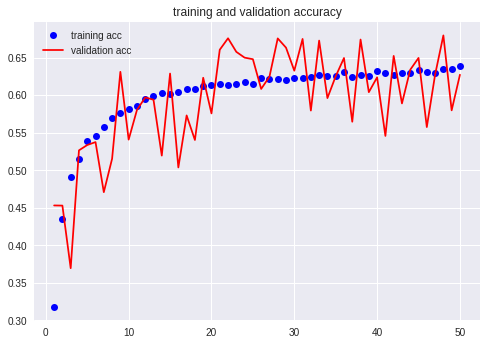

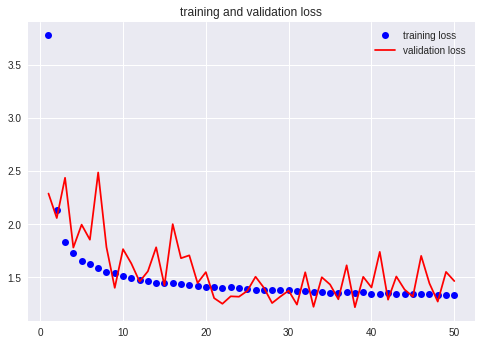

In [8]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**

In [9]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 1.4651514724731445
Validation accuracy: 62.71 %
